In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_x(xx, p, sk_or_mine='sklearn'):
    if sk_or_mine == 'sklearn':
        p = PolynomialFeatures(degree=p)
        return p.fit_transform(xx)
    else: 
        x_powers = [xx**(p+1) for p in range(p)]
        x_concated = np.hstack((np.array(x_powers)))
    #     print(x_concated.shape, xx.shape, p)
        return x_concated.reshape(xx.shape[0], xx.shape[1]*p)

In [3]:
def cent_normalize(*args):
    for xx in args:
        yield xx - xx.mean(0)

In [4]:
def generate_data_of_degree(p=1, m=100, n=1, sk_or_mine='sklearn'):
    '''
    m - number of examples
    p - max power of polynomial
    n - features of x
    '''
#     x = np.sort((2 - 3 * np.random.normal(0, 1, (m,n))),axis=0)
#     x = 3 - 2 * np.random.uniform(1, 2, (m,n))
#     x = np.linspace(0, 1, m*n).reshape(m,n)
    x = 3*np.random.normal(0,1,(m,n))
    x /= x.max()
    x_polyn = polynomial_x(x, p, 'sklearn')
    W = np.random.uniform(2, 3, (x_polyn.shape[1], 1))
    b = np.random.uniform(2, 3, (m, 1))
    
    y = b - x_polyn@W
    return y/y.max(), x

In [5]:
y_1, x_1 = cent_normalize(*generate_data_of_degree(p=1, m=30, n=1))
y_2, x_2 = cent_normalize(*generate_data_of_degree(p=2, m=30, n=1))
y_3, x_3 = cent_normalize(*generate_data_of_degree(p=3, m=30, n=1))
y_5, x_5 = cent_normalize(*generate_data_of_degree(p=5, m=30, n=1))

y_1_test, x_1_test = cent_normalize(*generate_data_of_degree(p=1, m=30, n=1))
y_2_test, x_2_test = cent_normalize(*generate_data_of_degree(p=2, m=30, n=1))
y_3_test, x_3_test = cent_normalize(*generate_data_of_degree(p=3, m=30, n=1))
y_5_test, x_5_test = cent_normalize(*generate_data_of_degree(p=5, m=30, n=1))

In [6]:
def OLS(X, y):
    '''
    pseudoinverse with SVD
    '''
    U,E,V_T = np.linalg.svd(X)
    sigmas_plus = np.zeros((X.shape[0], X.shape[1])).T
    sigmas_plus[:E.shape[0], :E.shape[0]] = np.linalg.inv(np.diag(E))
    return V_T.T@sigmas_plus@U.T@y

In [7]:
def regularized_OLS(X, y, lamda=0.1):
    return np.linalg.inv(X.T@X + lamda*np.eye(X.shape[1], X.shape[1]))@X.T@y

In [8]:
OLS(x_1, y_1), regularized_OLS(x_1, y_1, lamda=0)

(array([[-0.72699401]]), array([[-0.72699401]]))

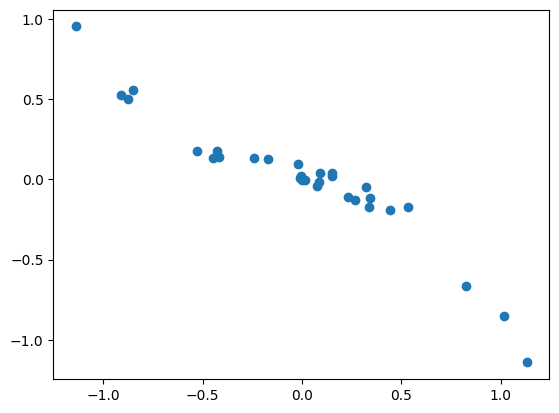

In [9]:
# train
plt.scatter(x_3, y_3)

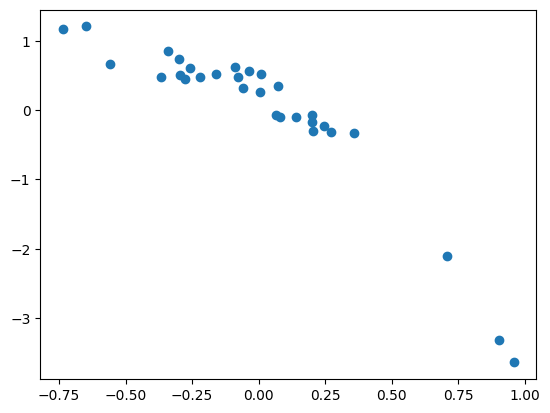

In [10]:
# test
plt.scatter(x_3_test, y_3_test)

In [11]:
# w_1 = OLS(x_1, y_1)
w_1_reg = regularized_OLS(x_1, y_1, lamda=0.02)
w_2_reg = regularized_OLS(x_2, y_2, lamda=0.02)
w_3_reg = regularized_OLS(x_3, y_3, lamda=0.02)
w_5_reg = regularized_OLS(x_5, y_5, lamda=0.02)

In [12]:
def plot_data_with_prediction(xx, yy, pred, title=''):
    plt.figure()
    plt.scatter(xx, yy, s=None, marker='.', color='g', alpha=0.9)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(xx, pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title(title)
    plt.show()

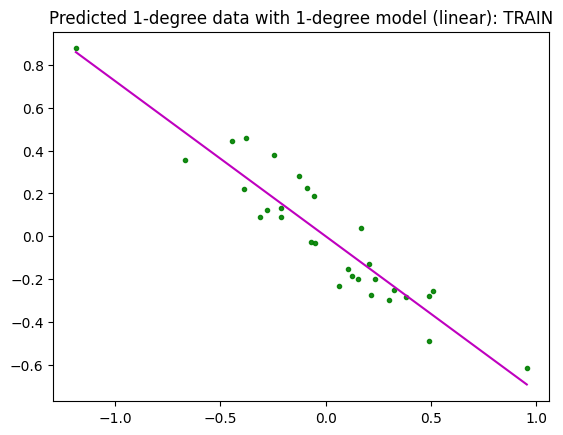

In [13]:
plot_data_with_prediction(x_1, y_1, x_1@w_1_reg, 'Predicted 1-degree data with 1-degree model (linear): TRAIN')

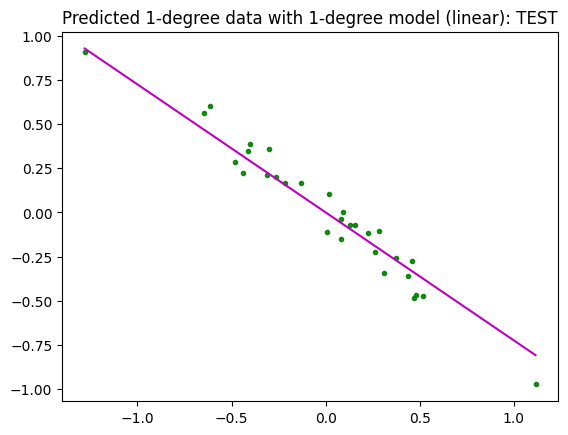

In [14]:
plot_data_with_prediction(x_1_test, y_1_test, x_1_test@w_1_reg, 'Predicted 1-degree data with 1-degree model (linear): TEST')

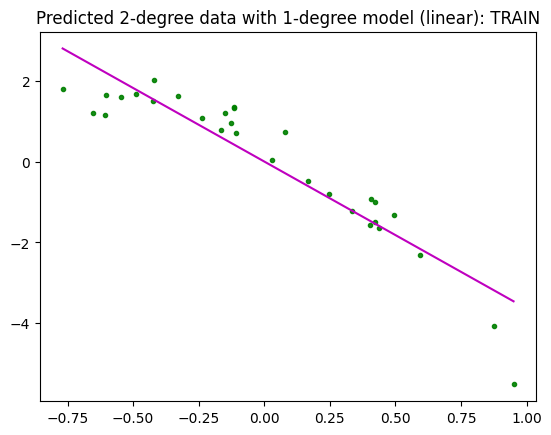

In [15]:
plot_data_with_prediction(x_2, y_2, x_2@w_2_reg, 'Predicted 2-degree data with 1-degree model (linear): TRAIN')

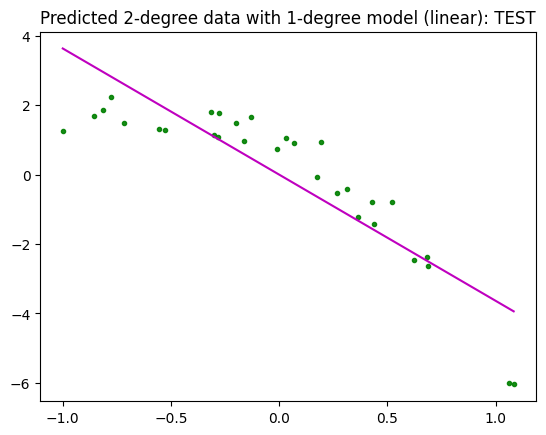

In [16]:
plot_data_with_prediction(x_2_test, y_2_test, x_2_test@w_2_reg, 'Predicted 2-degree data with 1-degree model (linear): TEST')

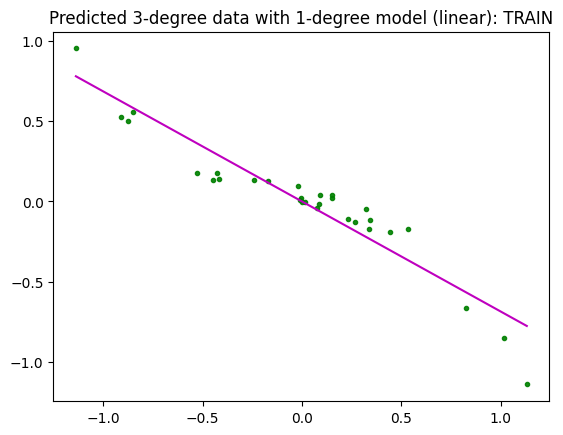

In [17]:
plot_data_with_prediction(x_3, y_3, x_3@w_3_reg, 'Predicted 3-degree data with 1-degree model (linear): TRAIN')

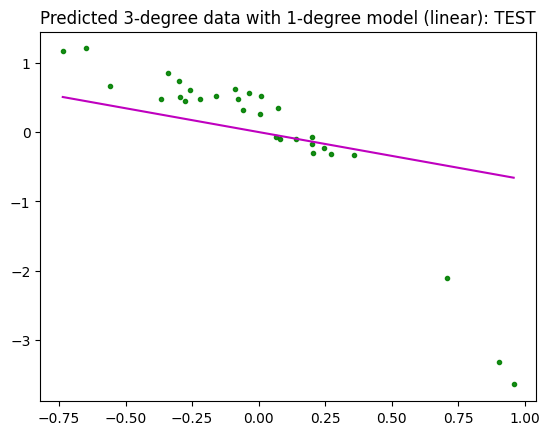

In [18]:
plot_data_with_prediction(x_3_test, y_3_test, x_3_test@w_3_reg, 'Predicted 3-degree data with 1-degree model (linear): TEST')

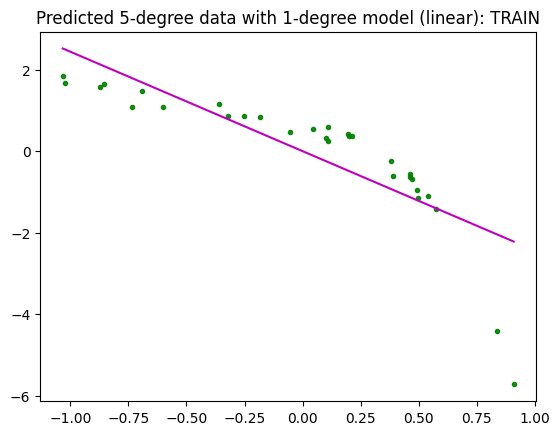

In [19]:
plot_data_with_prediction(x_5, y_5, x_5@w_5_reg, 'Predicted 5-degree data with 1-degree model (linear): TRAIN')

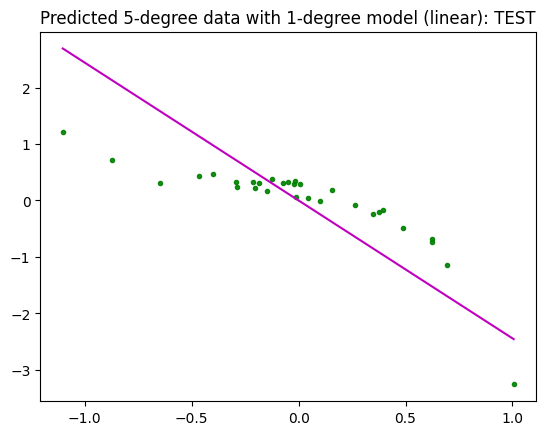

In [20]:
plot_data_with_prediction(x_5_test, y_5_test, x_5_test@w_5_reg, 'Predicted 5-degree data with 1-degree model (linear): TEST')

Polynomial Regression

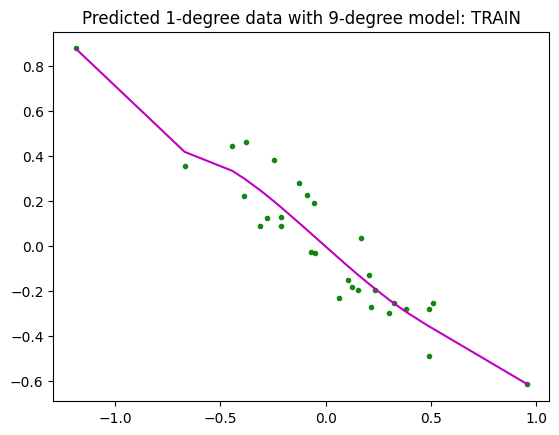

In [21]:
#overfit (too big model for linear data)
x_1_poly_9 = polynomial_x(x_1, p=9)
w_1_poly_9_reg = regularized_OLS(x_1_poly_9, y_1, lamda=0.03)
plot_data_with_prediction(x_1, y_1, x_1_poly_9@w_1_poly_9_reg, 'Predicted 1-degree data with 9-degree model: TRAIN')

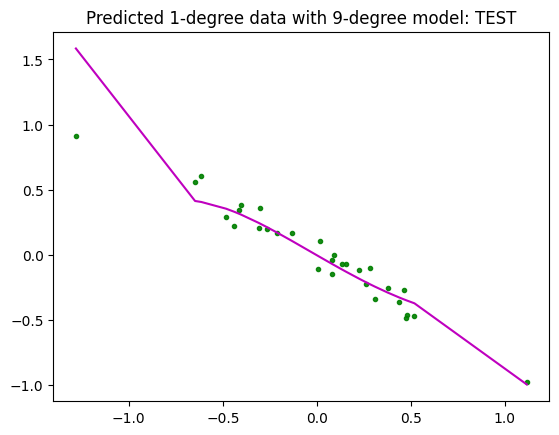

In [22]:
#overfit (too big model for linear data)
x_1_poly_9_test = polynomial_x(x_1_test, p=9)
plot_data_with_prediction(x_1_test, y_1_test, x_1_poly_9_test@w_1_poly_9_reg, 'Predicted 1-degree data with 9-degree model: TEST')

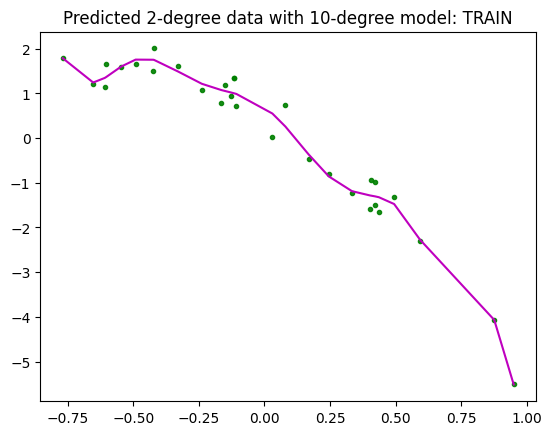

In [23]:
# overfit
w_2_poly_10_reg = regularized_OLS(polynomial_x(x_2, 10), y_2, lamda=0.)
plot_data_with_prediction(x_2, y_2, polynomial_x(x_2, 10)@w_2_poly_10_reg, 'Predicted 2-degree data with 10-degree model: TRAIN')

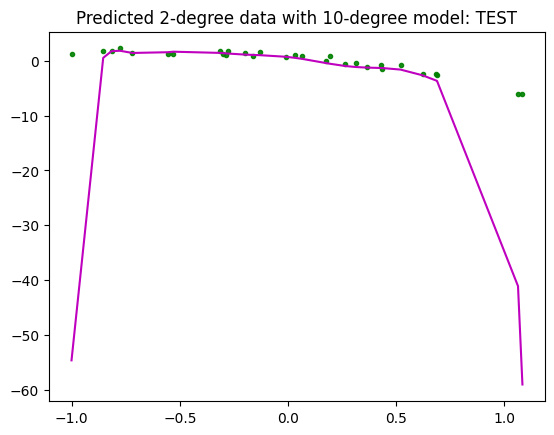

In [24]:
# overfit
plot_data_with_prediction(x_2_test, y_2_test, polynomial_x(x_2_test, 10)@w_2_poly_10_reg, 'Predicted 2-degree data with 10-degree model: TEST')

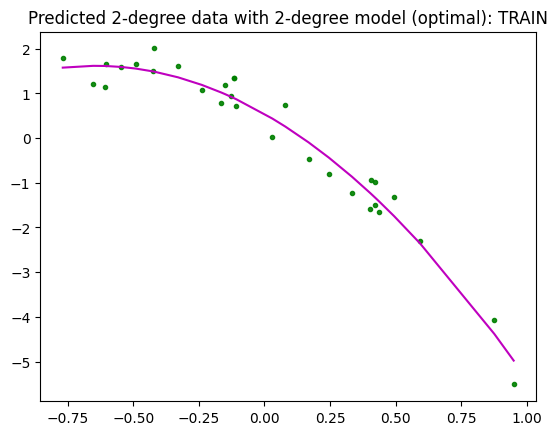

In [25]:
# optimal 
w_2_poly_2_reg = regularized_OLS(polynomial_x(x_2, 2), y_2, lamda=0.1)
plot_data_with_prediction(x_2, y_2, polynomial_x(x_2, 2)@w_2_poly_2_reg, 'Predicted 2-degree data with 2-degree model (optimal): TRAIN')

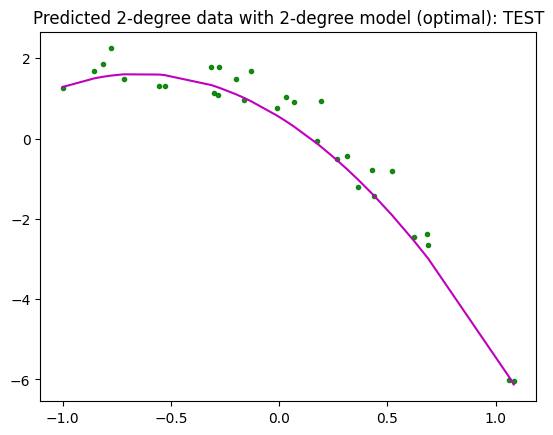

In [26]:
# optimal 
plot_data_with_prediction(x_2_test, y_2_test, polynomial_x(x_2_test, 2)@w_2_poly_2_reg, 'Predicted 2-degree data with 2-degree model (optimal): TEST')

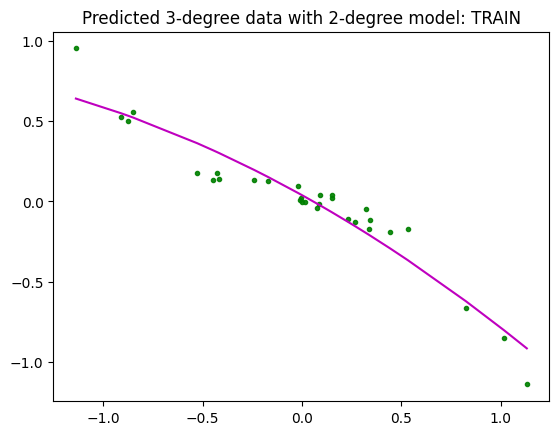

In [27]:
# not enough capacity 
w_3_poly_2_reg = regularized_OLS(polynomial_x(x_3, 2), y_3, lamda=0.1)
plot_data_with_prediction(x_3, y_3, polynomial_x(x_3, 2)@w_3_poly_2_reg, 'Predicted 3-degree data with 2-degree model: TRAIN')

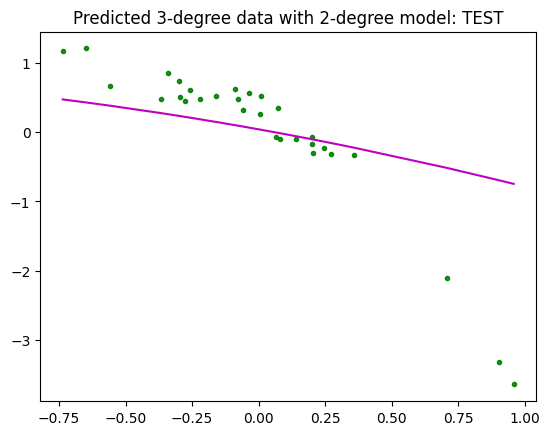

In [28]:
# not enough capacity 
plot_data_with_prediction(x_3_test, y_3_test, polynomial_x(x_3_test, 2)@w_3_poly_2_reg, 'Predicted 3-degree data with 2-degree model: TEST')

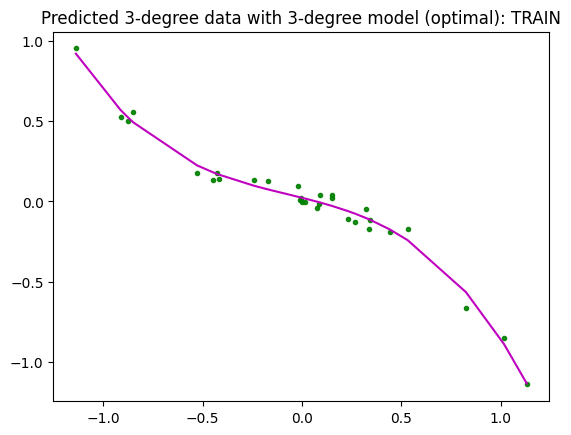

In [29]:
# optimal
w_3_poly_3_reg = regularized_OLS(polynomial_x(x_3, 3), y_3, lamda=0.1)
plot_data_with_prediction(x_3, y_3, polynomial_x(x_3, 3)@w_3_poly_3_reg, 'Predicted 3-degree data with 3-degree model (optimal): TRAIN')

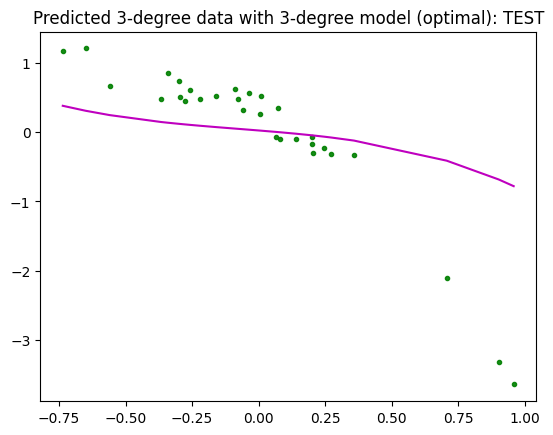

In [30]:
# optimal
plot_data_with_prediction(x_3_test, y_3_test, polynomial_x(x_3_test, 3)@w_3_poly_3_reg, 'Predicted 3-degree data with 3-degree model (optimal): TEST')

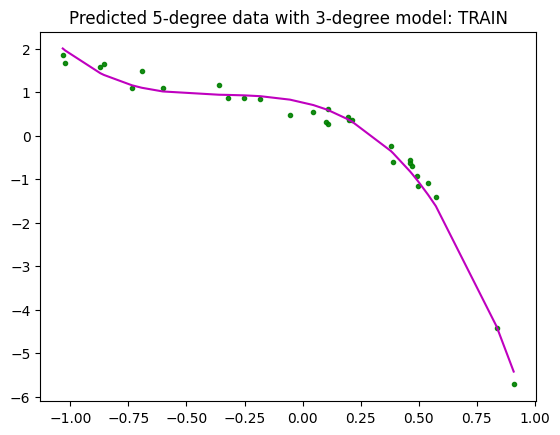

In [31]:
# not enough capacity
w_5_poly_3_reg = regularized_OLS(polynomial_x(x_5, 3), y_5, lamda=0.)
plot_data_with_prediction(x_5, y_5, polynomial_x(x_5, 3)@w_5_poly_3_reg, 'Predicted 5-degree data with 3-degree model: TRAIN')

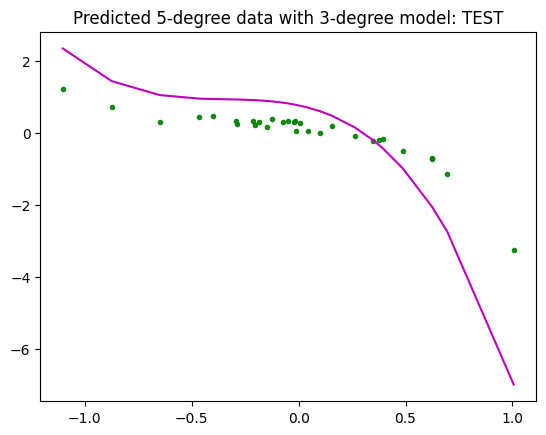

In [32]:
# not enough capacity
plot_data_with_prediction(x_5_test, y_5_test, polynomial_x(x_5_test, 3)@w_5_poly_3_reg, 'Predicted 5-degree data with 3-degree model: TEST')

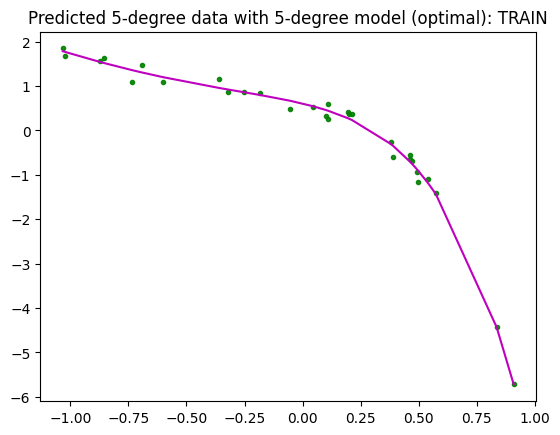

In [33]:
# optimal
w_5_poly_5_reg = regularized_OLS(polynomial_x(x_5, 5), y_5, lamda=0.)
plot_data_with_prediction(x_5, y_5, polynomial_x(x_5, 5)@w_5_poly_5_reg, 'Predicted 5-degree data with 5-degree model (optimal): TRAIN')

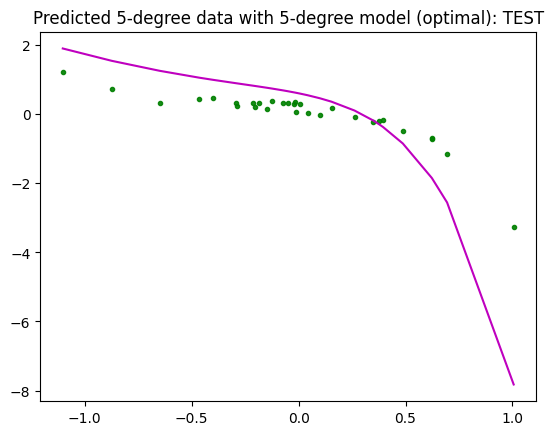

In [34]:
# optimal
plot_data_with_prediction(x_5_test, y_5_test, polynomial_x(x_5_test, 5)@w_5_poly_5_reg, 'Predicted 5-degree data with 5-degree model (optimal): TEST')

In [35]:
# optimal(linear) vs 2-degree: TRAIN
np.linalg.norm(y_1 - x_1@w_1_reg), np.linalg.norm(y_1 - polynomial_x(x_1, 2)@regularized_OLS( polynomial_x(x_1, 2),y_1))

(np.float64(0.616707650468095), np.float64(0.6160636684193809))

In [36]:
# optimal(linear) vs 2-degree: TEST
np.linalg.norm(y_1_test - x_1_test@w_1_reg), np.linalg.norm(y_1_test - polynomial_x(x_1_test, 2)@regularized_OLS(polynomial_x(x_1, 2),y_1))

(np.float64(0.4771528442691425), np.float64(0.5125965570585244))

In [37]:
# linear vs optimal(2-degree): TRAIN
np.linalg.norm(y_2 - x_2@w_2_reg), np.linalg.norm(y_2 - polynomial_x(x_2, 2)@regularized_OLS(polynomial_x(x_2, 2),y_2))

(np.float64(3.7236373859216068), np.float64(1.7608013220006118))

In [38]:
# linear vs optimal(2-degree): TEST
np.linalg.norm(y_2_test - x_2_test@w_2_reg), np.linalg.norm(y_2_test - polynomial_x(x_2_test, 2)@regularized_OLS(polynomial_x(x_2, 2),y_2))

(np.float64(5.701109293530299), np.float64(2.506683940671112))

In [39]:
# linear vs 2-degree vs optimal(3-degree): TRAIN
np.linalg.norm(y_3 - x_3@w_3_reg), np.linalg.norm(y_3 - polynomial_x(x_3, 2)@regularized_OLS(polynomial_x(x_3, 2),y_3)), np.linalg.norm(y_3 - polynomial_x(x_3, 3)@regularized_OLS(polynomial_x(x_3, 3),y_3))

(np.float64(0.6900430979408559),
 np.float64(0.6195394145940257),
 np.float64(0.24931976931915717))

In [40]:
# linear vs 2-degree vs optimal(3-degree): TEST
np.linalg.norm(y_3_test - x_3_test@w_3_reg), np.linalg.norm(y_3_test - polynomial_x(x_3_test, 2)@regularized_OLS(polynomial_x(x_3, 2),y_3)), np.linalg.norm(y_3_test- polynomial_x(x_3_test, 3)@regularized_OLS(polynomial_x(x_3, 3),y_3))

(np.float64(4.760316010427333),
 np.float64(4.622350233907588),
 np.float64(4.795729457111509))

In [41]:
# Nearest neighbor regression
def predict_NN_reg(xx,yy, x_):
    '''
    xx - set
    yy - target var
    x_ - to predict
    '''
    return yy[np.argmax(np.linalg.norm(xx-x_, axis=1))-1]

In [42]:
# Figure 5.2

In [43]:
y_2_, x_2_ = cent_normalize(*generate_data_of_degree(p=2, m=10, n=1))

In [44]:
x_2__poly_9 = polynomial_x(x_2_, p=9)

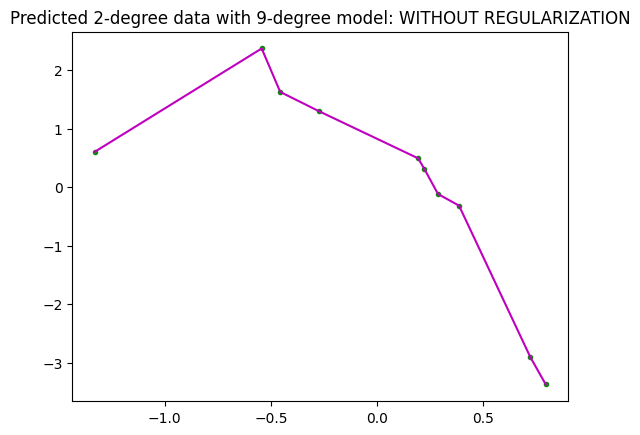

In [45]:
# overfit
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=0.0)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: WITHOUT REGULARIZATION')

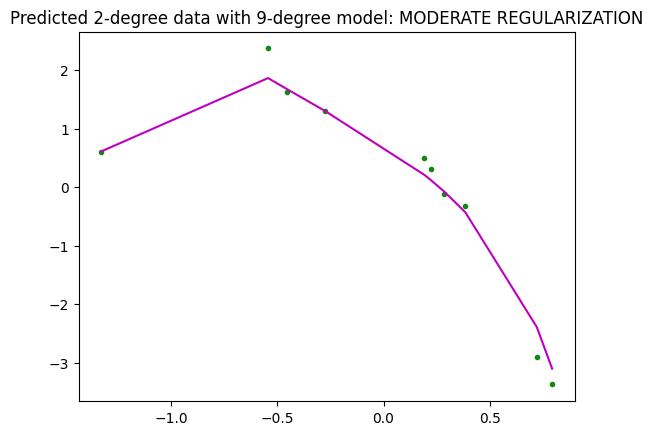

In [46]:
# get rid of overfitting
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=0.3)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: MODERATE REGULARIZATION')

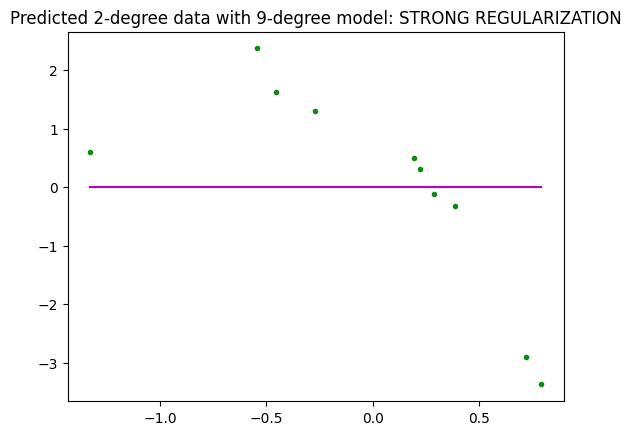

In [47]:
# constant function
w_2__poly_9_reg = regularized_OLS(x_2__poly_9, y_2_, lamda=1e10)
plot_data_with_prediction(x_2_, y_2_, x_2__poly_9@w_2__poly_9_reg, 'Predicted 2-degree data with 9-degree model: STRONG REGULARIZATION')

figure 5.4

In [48]:
# test_x, test_y = cent_normalize(*generate_data_of_degree(p=5, m=3000, n=1))
test_y, test_x = cent_normalize(*generate_data_of_degree(p=5, m=3000, n=1))

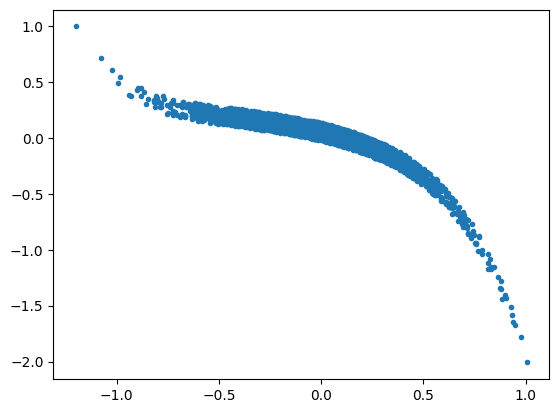

In [49]:
plt.scatter(test_x, test_y, marker='.')

In [50]:
train_sets = []
# sizes = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
sizes = np.linspace(5,1e5,30).astype(int)

for size in sizes:
    train_40_sets = []
    for i in range(40):
        train_y, train_x = cent_normalize(*generate_data_of_degree(p=5, m=int(size), n=1))
        train_40_sets.append((train_x, train_y))
    train_sets.append(train_40_sets)

In [ ]:
np.array(train_sets)[0][0][0].shape, np.array(train_sets)[0][0][1].shape

((5, 1), (5, 1))

In [ ]:
train_sets[1][0][0].shape, train_sets[1][0][1].shape

((3453, 1), (3453, 1))

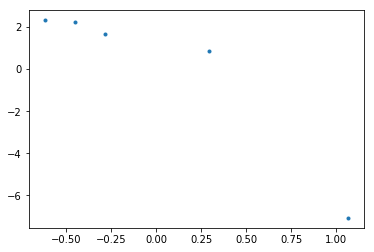

In [ ]:
plt.scatter(train_sets[0][0][0], train_sets[0][0][1], marker='.')

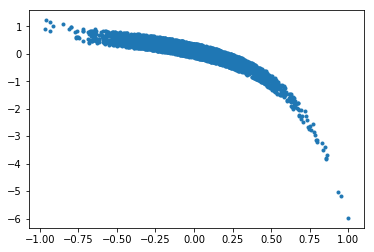

In [ ]:
plt.scatter(train_sets[1][0][0], train_sets[1][0][1], marker='.')

In [ ]:
test_x_poly_2 = polynomial_x(test_x, p=2)
test_x_poly_5 = polynomial_x(test_x, p=5)

In [ ]:
def conf_interval(xx):
    '''
    95% confidence interval
    '''
    z = 1.96
    mean = xx.mean()
    std_dev = np.sqrt(((xx - mean)**2).sum()*1/xx.shape[0])
    bottom_border = mean - z*std_dev/np.sqrt(xx.shape[0])
    top_border = mean + z*std_dev/np.sqrt(xx.shape[0])
    
    return bottom_border, top_border

In [ ]:
train_sets = np.array(train_sets)

In [ ]:
train_sets.shape

(30, 40, 2)

In [ ]:
from collections import defaultdict

train_errors_quadratic = defaultdict(list)
train_errors_optimal = defaultdict(list)

test_errors_quadratic = defaultdict(list)
test_errors_optimal = defaultdict(list)

# evaluating
for size in range(train_sets.shape[0]):
    for i in range(train_sets.shape[1]):
        train_x = train_sets[size][i][0]
        train_y = train_sets[size][i][1]
        
        # quadratic 
        x_5_poly_2 = polynomial_x(train_x,2)
        w_5_poly_2_reg = regularized_OLS(x_5_poly_2, train_y, lamda=0.1)
        y_pred_2 = x_5_poly_2@w_5_poly_2_reg
#         train_error_2 = np.linalg.norm(train_y - y_pred_2)
        train_error_2 = ((train_y - y_pred_2)**2).mean()
        train_errors_quadratic[size].append(train_error_2)
        
        # optimal (5-degree) 
        x_5_poly_5 = polynomial_x(train_x,5)
        w_5_poly_5_reg = regularized_OLS(x_5_poly_5, train_y, lamda=0.1)
        y_pred_5 = x_5_poly_5@w_5_poly_5_reg
#         train_error_5 = np.linalg.norm(train_y - y_pred_5)
        train_error_5 = ((train_y - y_pred_5)**2).mean()
        train_errors_optimal[size].append(train_error_5)
        
        # evaluate on test
        # quadratic
        y_pred_2_test = test_x_poly_2@w_5_poly_2_reg
#         test_error_2 = np.linalg.norm(test_y - y_pred_2_test)
        test_error_2 = ((test_y - y_pred_2_test)**2).mean()
        test_errors_quadratic[size].append(test_error_2)
        
        # optimal (5-degree) 
        y_pred_5_test = test_x_poly_5@w_5_poly_5_reg
#         test_error_5 = np.linalg.norm(test_y - y_pred_5_test)
        test_error_5 = ((test_y - y_pred_5_test)**2).mean()
        test_errors_optimal[size].append(test_error_5)